In [114]:
%matplotlib inline

In [153]:
from haversine import haversine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import cartopy
from bqplot import *
from matplotlib import animation as animation
import ipywidgets
import matplotlib.gridspec as gridspec
import geopandas as gp

In [116]:
array_vals = pd.read_csv("data-readonly/transportable_array/data_tohoku_norm_transpose.csv", header=None)

In [117]:
## This code comes from Prof Turk. Translates our 4 hour time period into the time of day between 2:46pm and 6:46pm. 
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

In [118]:
date_range = pd.date_range("2:46PM", "6:46PM", freq="1s")

In [119]:
# Now bringing in longitude and latitudes of stations
locations = pd.read_csv("/srv/nbgrader/data/transportable_array/location.txt",
                        delimiter="\t", names =["longitude", "latitude", "a", "b"])
del locations["a"], locations["b"]
locations = locations.T
locations

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
longitude,-98.683,-98.102,-98.068,-117.110,-107.790,-98.916,-98.079,-97.410,-96.530,-95.756,...,-93.280,-98.765,-97.916,-97.253,-96.434,-95.623,-94.985,-94.182,-93.400,-92.803
latitude,27.065,26.938,26.463,32.889,32.532,32.608,32.573,32.557,32.475,32.597,...,34.012,33.286,33.371,33.331,33.270,33.198,33.260,33.242,33.258,33.258


/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


KeyError: 'longitude'

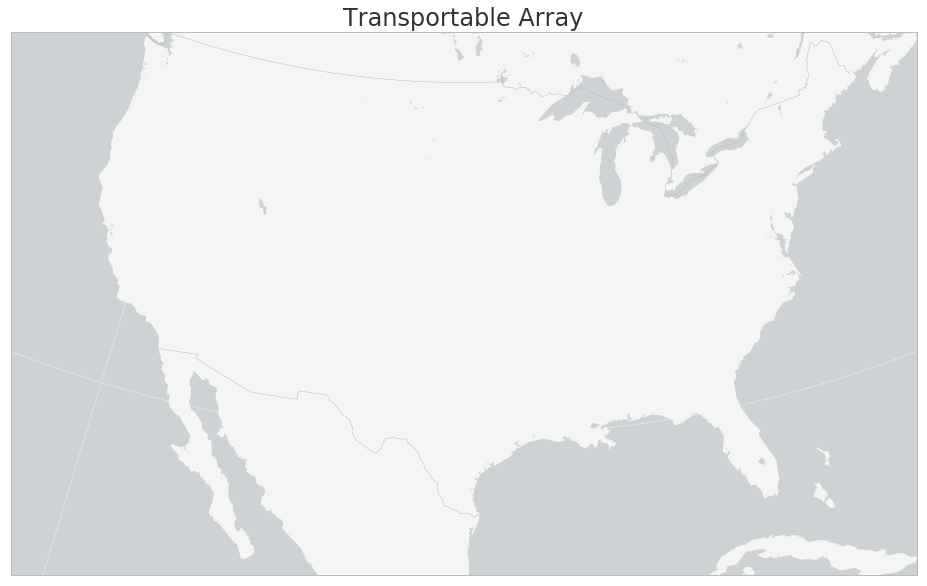

In [97]:
# This code creates the graphs that will serve as the foundation for our video.
# A Lambert Conformal basemap is inserted, and we center on US. 
# Stations are plotted by longitude and latitude. 
# Color is used to indicate the seismic activity. A diverging colormap is chosen to indicate positive and negative values.
# The min and max on the color scale are set to include min and max of the entire data set, but to place "0" at a neutral, central color.
# In this demo version, we show only 1-5 frames for speed when debugging. When we go live, we'll use the entire "date_range," of course. 

# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#0000ff'
marker_edge_color = 'None'

for i, d in enumerate(date_range[(40*60):(40*60+1)] - date_range[0]): # one graph

#for i, d in enumerate(date_range - date_range[0]): # all graphs
    # create the plot
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
    ax.set_title('Transportable Array', fontsize=24, color='#333333')

    # draw the basemap and its features
    m = Basemap(width=5500000,height=3300000,
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=45.,lat_2=55,lat_0=37,lon_0=-98.)
    m.drawmapboundary(color=border_color, fill_color=water_color)
    m.drawcoastlines(color=coastline_color)
    m.drawcountries(color=border_color)
    m.fillcontinents(color=land_color, lake_color=water_color)
    m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
    m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)
    
    color = array_vals.loc[d]
    # plt.figure()
    x, y = m(locations['longitude'].values, locations['latitude'].values)
    m.scatter(x, y, c = color, cmap = "coolwarm", s = 25, vmin = -1.65, vmax = 1.65, zorder=3)
    ax.set_title("Time Elapsed: %s"%MZ, fontsize = 18)
    cbar = plt.colorbar()
    cbar.set_label("Amplitude", fontsize = 14)
    fig_name = "video_figs/output_%06d.png"%i
    plt.savefig(fig_name)

In [120]:
stations = pd.concat([locations, array_vals]) 
stations.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
longitude,-98.683000,-98.102000,-98.068000,-117.110000,-107.790000,-98.916000,-98.079000,-97.410000,-96.530000,-95.756000,...,-93.280000,-98.765000,-97.916000,-97.253000,-96.434000,-95.623000,-94.985000,-94.182000,-93.400000,-92.803000
latitude,27.065000,26.938000,26.463000,32.889000,32.532000,32.608000,32.573000,32.557000,32.475000,32.597000,...,34.012000,33.286000,33.371000,33.331000,33.270000,33.198000,33.260000,33.242000,33.258000,33.258000
0 days 00:00:00,-0.000255,-0.000068,0.000406,-0.000275,0.000070,0.000041,-0.000070,-0.000040,0.000152,0.000039,...,-0.000156,0.000025,0.000064,0.000047,0.000030,0.000080,0.000051,0.000156,0.000282,-0.000024
0 days 00:00:01,-0.000238,-0.000085,0.000411,-0.000293,0.000085,0.000058,-0.000027,-0.000042,0.000141,0.000151,...,-0.000118,0.000127,0.000029,0.000056,0.000093,0.000016,0.000016,0.000056,0.000280,-0.000036
0 days 00:00:02,-0.000220,-0.000102,0.000413,-0.000308,0.000099,0.000073,0.000015,-0.000042,0.000129,0.000259,...,-0.000080,0.000225,-0.000005,0.000065,0.000153,-0.000046,-0.000019,-0.000042,0.000275,-0.000049


In [123]:
# longitude and latitude of Tohoku quake c/o Google 
tohoku_quake = (38.3, 142.4)
station1 = stations[3][1], stations[3][0] # latitude then longitude
haversine(tohoku_quake, station1, miles = True)

#dist_from_quake = 
dists = []
for s in stations:
    station = stations[s][1], stations[s][0]
    dist = haversine(tohoku_quake, station, miles = True)
    dists.append(dist)
    
distances = pd.DataFrame(dists)
distances.columns = ['dist']
distances.sort_values(by = 'dist', inplace = True, ascending = True)
#... okay, getting late. Here, planning to... 
# 1. calcuate distance between stations and Tohoku quake
# 2. sort them in order of least to greatest distance, but need to also retain the original index.
# 3. Use this new order in the graphing code below.

In [175]:
test2 = stations.T
distances1 = distances
distOrder = pd.merge(distances1, left_index=True, right_index=True, right=test2)
distOrder.head()
testt = pd.DataFrame(distOrder)
testt.reset_index(inplace = True)
#testt

,index,dist,longitude,latitude,0 days 00:00:00,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03,0 days 00:00:04,0 days 00:00:05,...,0 days 03:59:51,0 days 03:59:52,0 days 03:59:53,0 days 03:59:54,0 days 03:59:55,0 days 03:59:56,0 days 03:59:57,0 days 03:59:58,0 days 03:59:59,0 days 04:00:00
0,83,4495.397254,-122.710,48.720,-0.000482,-0.000490,-0.000493,-0.000494,-0.000491,-4.853000e-04,...,-0.008445,-0.008026,-0.007518,-0.006942,-0.006321,-0.005673,-0.005017,-0.004367,-0.003736,0.000000
1,122,4521.916888,-123.090,47.535,0.000612,0.000394,0.000177,-0.000030,-0.000221,-3.940000e-04,...,-0.009657,-0.009133,-0.008522,-0.007849,-0.007135,-0.006400,-0.005662,-0.004935,-0.004233,-0.003567
2,94,4535.498351,-122.100,48.264,-0.000227,-0.000271,-0.000311,-0.000346,-0.000376,-3.994300e-04,...,-0.007167,-0.006601,-0.005988,-0.005356,-0.004732,-0.004136,-0.003583,-0.003079,-0.002622,0.000000
3,123,4547.384419,-122.770,47.179,0.006577,0.006650,0.006660,0.006616,0.006528,6.403600e-03,...,-0.016533,-0.016002,-0.015280,-0.014373,-0.013294,-0.012066,-0.010723,-0.009306,-0.007864,0.000000
4,151,4576.791105,-123.010,46.083,-0.000892,-0.001083,-0.001258,-0.001414,-0.001546,-1.654700e-03,...,-0.007240,-0.006593,-0.005928,-0.005265,-0.004618,-0.003997,-0.003409,-0.002863,-0.002362,-0.001912
5,137,4577.710999,-122.570,46.557,0.001143,0.001264,0.001374,0.001469,0.001549,1.610800e-03,...,-0.000869,-0.000480,-0.000142,0.000132,0.000331,0.000452,0.000499,0.000482,0.000418,0.000000
6,107,4595.437062,-120.890,47.923,-0.000036,-0.000053,-0.000068,-0.000081,-0.000091,-1.001800e-04,...,-0.003043,-0.002918,-0.002757,-0.002565,-0.002345,-0.002100,-0.001837,-0.001565,-0.001293,0.000000
7,165,4597.805440,-123.260,45.212,0.000501,0.000159,-0.000176,-0.000493,-0.000787,-1.050500e-03,...,-0.010327,-0.009737,-0.009046,-0.008281,-0.007469,-0.006635,-0.005802,-0.004988,-0.004210,0.000000
8,193,4613.014119,-123.850,44.106,0.002861,0.003157,0.003419,0.003642,0.003827,3.970400e-03,...,-0.005995,-0.005475,-0.004947,-0.004422,-0.003909,-0.003413,-0.002940,-0.002495,-0.002083,-0.001708
9,211,4643.916841,-123.930,43.161,-0.001273,-0.001865,-0.002425,-0.002937,-0.003392,-3.783600e-03,...,-0.013844,-0.013124,-0.012316,-0.011433,-0.010486,-0.009486,-0.008445,-0.007381,-0.006317,-0.005281


In [ ]:
def make_plot(station):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
    ax.set_title('Transportable Array', fontsize=24, color='#333333')

    # draw the basemap and its features
    m = Basemap(width=5500000,height=3300000,
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=45.,lat_2=55,lat_0=37,lon_0=-98.)
    m.drawmapboundary(color=border_color, fill_color=water_color)
    m.drawcoastlines(color=coastline_color)
    m.drawcountries(color=border_color)
    m.fillcontinents(color=land_color, lake_color=water_color)
    m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
    m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)

    x, y = m(testt['longitude'].values, testt['latitude'].values)
    m.scatter(x, y, c = color, cmap = "coolwarm", s = 15, vmin = testt.iloc[station].min().min(), vmax = testt.iloc[station].max().max(), zorder=3)

interactive_plot = interactive(make_plot, station = (0, 437, 1), size = (testt.iloc[station].values))

In [201]:
testt.iloc[0].values

array([  8.30000000e+01,   4.49539725e+03,  -1.22710000e+02, ...,
        -4.36740000e-03,  -3.73600000e-03,   0.00000000e+00])

In [ ]:
@ipywidgets.interact(station = (0, 437, 1))
def make_plot(station = 0):
    # line plot
    plt.subplot(211) # stations
    m.plot(testt.index)
    #plt.xlim(00:00:00, 4:00:00)
    plt.ylim(array_vals.min().min(), array_vals.max().max())
    # map
    plt.subplot(222) # map
    plt.scatter(testt.index["latitude"], testt.index["longitude"])
    plt.ylim(-180, 0)
    plt.xlim(0, 90)
    # spectogram
   # plt.subplot(221) # seismo